# Insurance Premuium Prediction

In [52]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# Laod the Data Set
df=pd.read_csv(r"E:\DS_ACADEMIC\Interview_Question\Django_ML\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [54]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [55]:
df.shape

(1338, 7)

In [56]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [59]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [60]:
# Check duplicates
duplicates=df.duplicated().sum()
print(duplicates)

1


In [61]:
df=df.drop_duplicates()

In [62]:
df.shape

(1337, 7)

C:\Users\viren\AppData\Local\Temp\ipykernel_31164\1308452568.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],ax=axes[0], kde=False)
C:\Users\viren\AppData\Local\Temp\ipykernel_31164\1308452568.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],ax=axes[0], kde=False)
C:\Users\vir

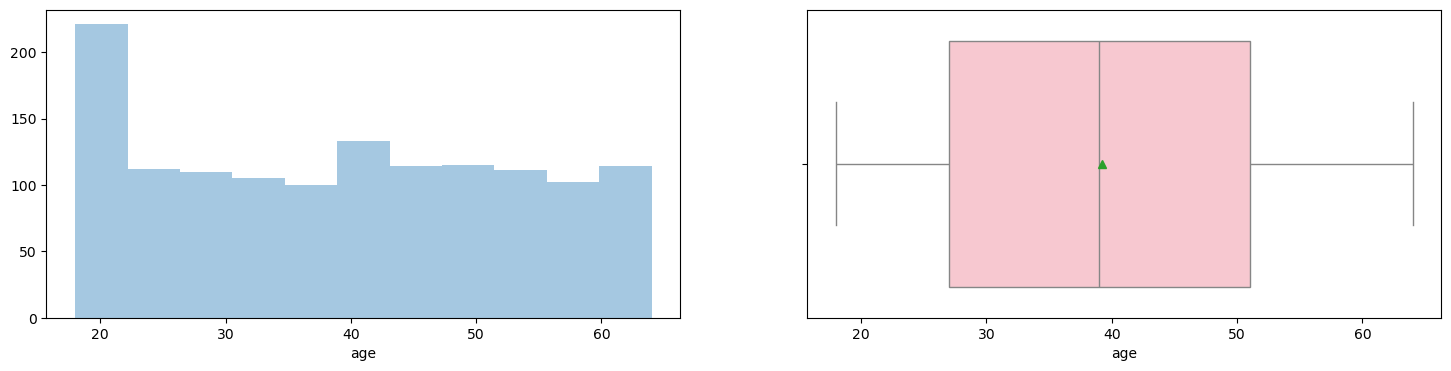

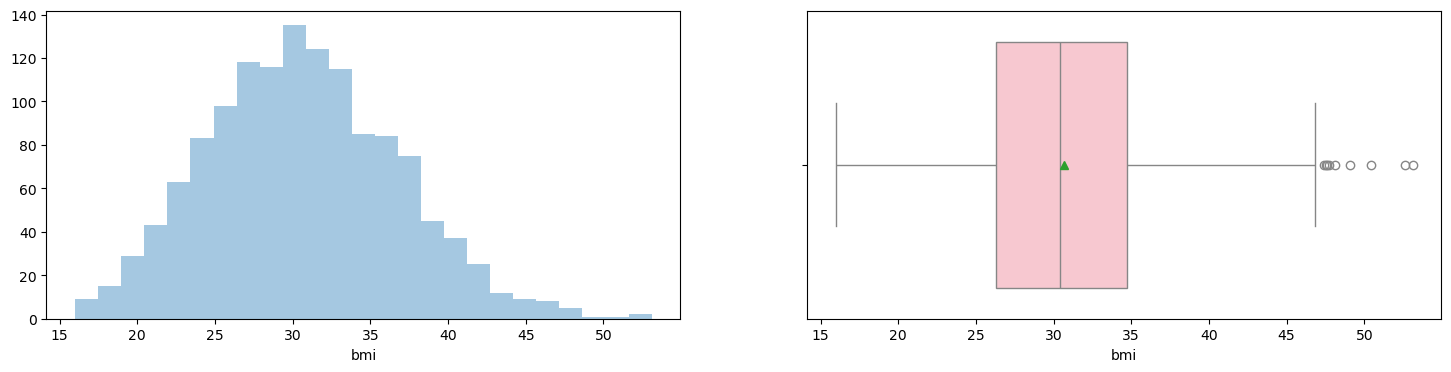

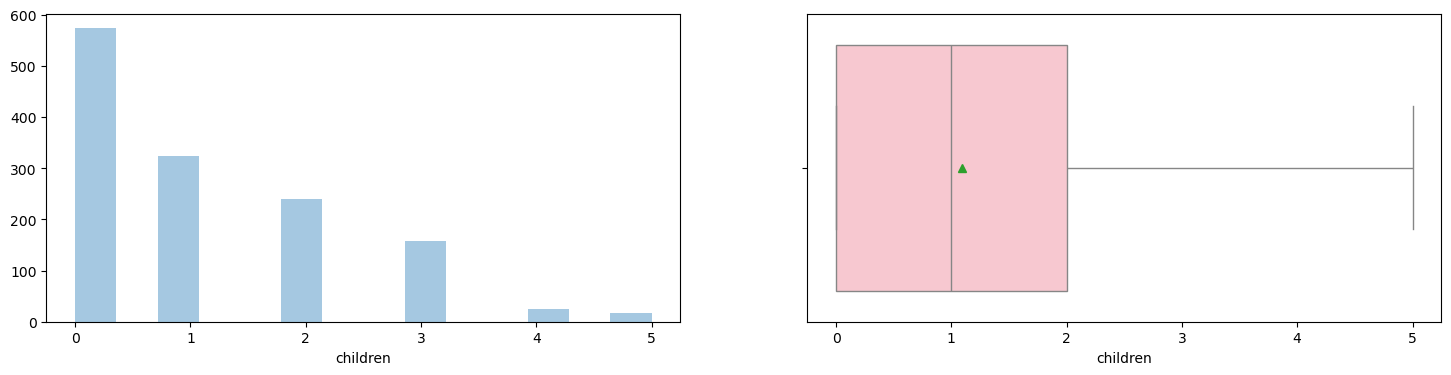

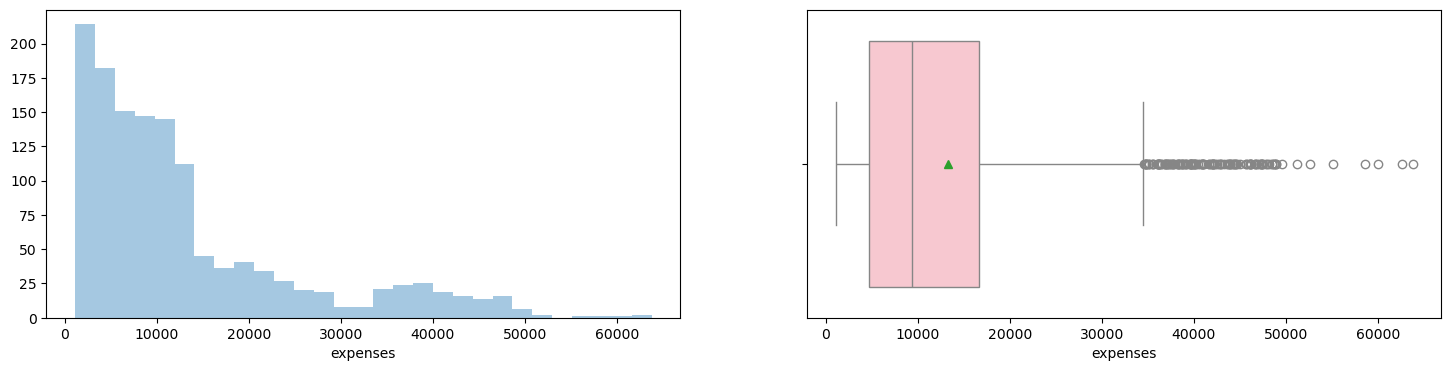

In [63]:
# Data Analysis
x_axis=['age','bmi','children','expenses']
for x in x_axis:
    fig, axes=plt.subplots(1,2, figsize=(18,4))
    sns.distplot(df[x],ax=axes[0], kde=False)
    sns.boxplot(df[x],ax=axes[1], orient='h',showmeans=True, color='pink')

## Handle Categorical Columns

In [64]:
df.head(6)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62


In [65]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [66]:
df['sex']=df.sex.map({'female':0,'male':1})

In [67]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1337, dtype: int64

In [68]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [69]:
df['smoker']=df.smoker.map({'yes':1,'no':0})

In [71]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [73]:
df['region']=df.region.map({'southwest':1,"southeast":2, 'northwest':3, 'northeast':4})

In [74]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,1,2007.95


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


# Split the dataset

In [76]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [81]:
x=df.drop(['expenses'], axis=1)
y=df[['expenses']]

In [82]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3
1334,18,0,31.9,0,0,4
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,1


In [83]:
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


# Train test split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [86]:
x_train.shape

(1069, 6)

In [88]:
x_test.shape

(268, 6)

# Model trainning

In [90]:
# Linear Regression
from sklearn.linear_model import LinearRegression 

In [91]:
lr=LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred=lr.predict(x_test)

In [95]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_pred)

In [96]:
score1

0.7661726781104199

In [97]:
# Support vector regressor
from sklearn.svm import SVR
svm=SVR()

In [98]:
svm.fit(x_train,y_train)

C:\Users\viren\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [99]:
y_pred=svm.predict(x_test)

In [100]:
from sklearn.metrics import r2_score
score2=r2_score(y_test,y_pred)

In [101]:
score2

-0.11805832956353246

In [102]:
# Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [103]:
rf.fit(x_train,y_train)

C:\Users\viren\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [104]:
y_pred=rf.predict(x_test)

In [105]:
from sklearn.metrics import r2_score
score3=r2_score(y_test,y_pred)

In [106]:
score3

0.8335408602585062

In [107]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,1,2007.95


In [112]:
data={'age':40, 
      'sex':1, 
      'bmi':40,
      'children':3,
     'smoker':1,
     'region':2}
new_df=pd.DataFrame(data, index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,40,1,40,3,1,2


In [114]:
pred=rf.predict(new_df)
pred

array([42923.1728])

In [115]:
pred[0]

42923.172799999986

In [116]:
import joblib
joblib.dump(rf,'random_forest_regressor_trained')

['random_forest_regressor_trained']